In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.2.6 Get the City Weather Data

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
import json

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

769

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | saint-georges
Processing Record 5 of Set 1 | ojinaga
Processing Record 6 of Set 1 | nederland
Processing Record 7 of Set 1 | karkaralinsk
City not found. Skipping...
Processing Record 8 of Set 1 | samusu
City not found. Skipping...
Processing Record 9 of Set 1 | newala
Processing Record 10 of Set 1 | ahipara
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | hofn
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | nara
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | launceston
Processing Record 19 of Set 1 | srednekolymsk
Processing Record 20 of Set 1 | linqiong
Processing Record 21 of S

Processing Record 40 of Set 4 | miraflores
Processing Record 41 of Set 4 | puerto lempira
Processing Record 42 of Set 4 | barcelona
Processing Record 43 of Set 4 | esperance
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | hualmay
Processing Record 46 of Set 4 | auki
Processing Record 47 of Set 4 | nguiu
City not found. Skipping...
Processing Record 48 of Set 4 | macas
Processing Record 49 of Set 4 | pacific grove
Processing Record 50 of Set 4 | huarmey
Processing Record 1 of Set 5 | zuwarah
Processing Record 2 of Set 5 | teguldet
Processing Record 3 of Set 5 | wajima
Processing Record 4 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 5 of Set 5 | ouadda
Processing Record 6 of Set 5 | redlands
Processing Record 7 of Set 5 | russell
Processing Record 8 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 9 of Set 5 | pedernales
Processing Record 10 of Set 5 | san cristobal
Processing Record 11 of Set 5 | colares
Processing Re

Processing Record 26 of Set 8 | lubao
Processing Record 27 of Set 8 | cap malheureux
Processing Record 28 of Set 8 | fereydun kenar
Processing Record 29 of Set 8 | riachos
Processing Record 30 of Set 8 | chicama
Processing Record 31 of Set 8 | asau
Processing Record 32 of Set 8 | bad ischl
Processing Record 33 of Set 8 | najran
Processing Record 34 of Set 8 | tromso
Processing Record 35 of Set 8 | gusev
Processing Record 36 of Set 8 | katsiveli
City not found. Skipping...
Processing Record 37 of Set 8 | marsa matruh
Processing Record 38 of Set 8 | yunjinghong
City not found. Skipping...
Processing Record 39 of Set 8 | taitung
Processing Record 40 of Set 8 | la orilla
Processing Record 41 of Set 8 | tessalit
Processing Record 42 of Set 8 | narsaq
Processing Record 43 of Set 8 | meyungs
City not found. Skipping...
Processing Record 44 of Set 8 | catuday
Processing Record 45 of Set 8 | whyalla
Processing Record 46 of Set 8 | arkhangelos
City not found. Skipping...
Processing Record 47 of 

Processing Record 13 of Set 12 | gao
Processing Record 14 of Set 12 | bonavista
Processing Record 15 of Set 12 | minnedosa
Processing Record 16 of Set 12 | tuyen quang
Processing Record 17 of Set 12 | mpika
Processing Record 18 of Set 12 | katghora
Processing Record 19 of Set 12 | bhopalwala
Processing Record 20 of Set 12 | raudeberg
Processing Record 21 of Set 12 | bandar penggaram
City not found. Skipping...
Processing Record 22 of Set 12 | chapada dos guimaraes
Processing Record 23 of Set 12 | salinopolis
Processing Record 24 of Set 12 | sao joao do piaui
Processing Record 25 of Set 12 | muros
Processing Record 26 of Set 12 | boende
Processing Record 27 of Set 12 | bila
Processing Record 28 of Set 12 | nieuw amsterdam
Processing Record 29 of Set 12 | ewa beach
Processing Record 30 of Set 12 | kumbhraj
Processing Record 31 of Set 12 | kirando
Processing Record 32 of Set 12 | sapele
Processing Record 33 of Set 12 | chiungutwa
Processing Record 34 of Set 12 | port-gentil
Processing Rec

Processing Record 3 of Set 16 | coihaique
Processing Record 4 of Set 16 | horadiz
Processing Record 5 of Set 16 | bol
Processing Record 6 of Set 16 | vagur
Processing Record 7 of Set 16 | pemangkat
Processing Record 8 of Set 16 | borgarnes
Processing Record 9 of Set 16 | morehead
Processing Record 10 of Set 16 | kirovskiy
Processing Record 11 of Set 16 | moiyabana
City not found. Skipping...
Processing Record 12 of Set 16 | leander
Processing Record 13 of Set 16 | igarka
Processing Record 14 of Set 16 | barraute
Processing Record 15 of Set 16 | yulara
Processing Record 16 of Set 16 | redmond
Processing Record 17 of Set 16 | aquiraz
Processing Record 18 of Set 16 | terney
Processing Record 19 of Set 16 | hunza
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
#type(city_data)
len(city_data)

707

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alice Springs,-23.7000,133.8833,69.80,40,48,6.91,AU,2021-01-16 17:30:16
1,Barrow,71.2906,-156.7887,-0.40,71,90,20.71,US,2021-01-16 17:29:44
2,Punta Arenas,-53.1500,-70.9167,60.80,59,90,11.50,CL,2021-01-16 17:29:49
3,Saint-Georges,12.0564,-61.7485,86.00,66,40,23.02,GD,2021-01-16 17:31:38
4,Ojinaga,29.5667,-104.4167,57.00,34,1,0.69,MX,2021-01-16 17:31:38
5,Nederland,29.9744,-93.9924,53.60,35,1,12.66,US,2021-01-16 17:31:38
6,Newala,-10.9431,39.2787,69.89,100,86,4.09,TZ,2021-01-16 17:31:39
7,Ahipara,-35.1667,173.1667,62.24,93,14,5.82,NZ,2021-01-16 17:31:39
8,East London,-33.0153,27.9116,69.80,68,0,19.57,ZA,2021-01-16 17:29:42
9,Hofn,64.2539,-15.2082,41.56,69,100,26.31,IS,2021-01-16 17:31:39


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

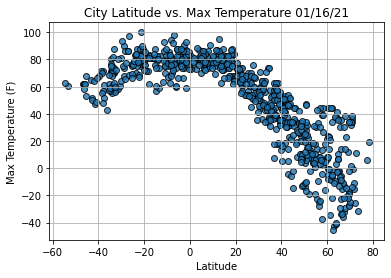

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

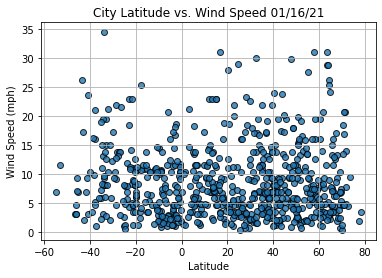

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

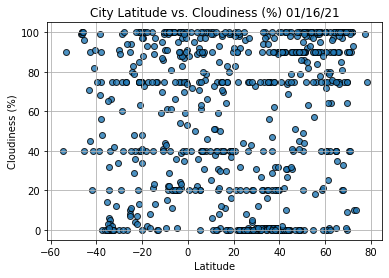

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()
